In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [2]:
facts = pd.read_csv('PER_Ranking copy.csv', delimiter=',')

In [3]:
columns = facts.columns.tolist()
columns = columns[8:]
facts = facts.drop(columns, axis=1)
facts[['name','code']]=facts['Player'].str.split('\\', expand=True)

In [4]:
facts

,Rk,Player,Pos,Age,Tm,G,MP,PER▼,name,code
0,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,James Harden\hardeja01,SG,28.0,HOU,72.0,2551.0,29.8,James Harden,hardeja01
2,2,Anthony Davis\davisan02,PF,24.0,NOP,75.0,2727.0,28.9,Anthony Davis,davisan02
3,3,LeBron James\jamesle01,PF,33.0,CLE,82.0,3026.0,28.6,LeBron James,jamesle01
4,4,Stephen Curry\curryst01,PG,29.0,GSW,51.0,1631.0,28.2,Stephen Curry,curryst01
...,...,...,...,...,...,...,...,...,...,...
191,191,Tony Snell\snellto01,SG,26.0,MIL,75.0,2053.0,8.5,Tony Snell,snellto01
192,192,J.R. Smith\smithjr01,SG,32.0,CLE,80.0,2244.0,8.4,J.R. Smith,smithjr01
193,193,P.J. Tucker\tuckepj01,PF,32.0,HOU,82.0,2281.0,8.3,P.J. Tucker,tuckepj01
194,194,Dragan Bender\bendedr01,PF,20.0,PHO,82.0,2069.0,7.1,Dragan Bender,bendedr01


In [5]:
facts2 = pd.read_csv('all_seasons.csv', delimiter=',')

In [6]:
facts2 = facts2[facts2.season == '2017-18']

In [7]:
facts2

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9561,9561,Briante Weber,MEM,25.0,187.96,74.84268,Virginia Commonwealth,USA,Undrafted,Undrafted,...,2.8,1.9,1.2,-21.6,0.030,0.130,0.111,0.527,0.139,2017-18
9562,9562,Jae Crowder,UTA,27.0,198.12,106.59412,Marquette,USA,2012,2,...,9.7,3.4,1.2,0.6,0.029,0.103,0.169,0.525,0.071,2017-18
9563,9563,Jahlil Okafor,BKN,22.0,210.82,117.93392,Duke,USA,2015,1,...,6.3,3.0,0.4,-22.6,0.058,0.190,0.216,0.584,0.070,2017-18
9564,9564,Jake Layman,POR,24.0,205.74,95.25432,Maryland,USA,2016,2,...,1.0,0.5,0.3,-11.5,0.024,0.078,0.139,0.352,0.099,2017-18
9565,9565,Jakob Poeltl,TOR,22.0,213.36,104.32616,Utah,Austria,2016,1,...,6.9,4.8,0.7,8.3,0.107,0.150,0.143,0.662,0.054,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,10096,Austin Rivers,LAC,25.0,193.04,90.71840,Duke,USA,2012,1,...,15.1,2.4,4.0,-1.7,0.013,0.058,0.206,0.526,0.179,2017-18
10097,10097,Avery Bradley,LAC,27.0,187.96,81.64656,Texas,USA,2010,1,...,14.3,2.5,2.0,-4.2,0.014,0.068,0.229,0.496,0.105,2017-18
10098,10098,Bam Adebayo,MIA,20.0,208.28,115.66596,Kentucky,USA,2017,1,...,6.9,5.5,1.5,-0.6,0.086,0.194,0.157,0.570,0.115,2017-18
10099,10099,Ben McLemore,MEM,25.0,195.58,88.45044,Kansas,USA,2013,1,...,7.5,2.5,0.9,-13.5,0.030,0.101,0.182,0.526,0.078,2017-18


In [8]:
data= pd.merge(facts, facts2, left_on='name', right_on="player_name", how='left')

In [9]:
columns2 = data.columns.tolist()

In [10]:
print(columns2)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER▼', 'name', 'code', 'Unnamed: 0', 'player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season']


In [11]:
columns3 = columns2[19:31]

In [12]:
print (columns3)

['draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']


In [13]:
data = data.drop(columns3, axis=1)

In [14]:
data

,Rk,Player,Pos,Age,Tm,G,MP,PER▼,name,code,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season
0,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,James Harden\hardeja01,SG,28.0,HOU,72.0,2551.0,29.8,James Harden,hardeja01,9573.0,James Harden,HOU,28.0,195.58,99.790240,Arizona State,USA,2009,2017-18
2,2,Anthony Davis\davisan02,PF,24.0,NOP,75.0,2727.0,28.9,Anthony Davis,davisan02,10095.0,Anthony Davis,NOP,25.0,208.28,114.758776,Kentucky,USA,2012,2017-18
3,3,LeBron James\jamesle01,PF,33.0,CLE,82.0,3026.0,28.6,LeBron James,jamesle01,9956.0,LeBron James,CLE,33.0,203.20,113.398000,None,USA,2003,2017-18
4,4,Stephen Curry\curryst01,PG,29.0,GSW,51.0,1631.0,28.2,Stephen Curry,curryst01,9819.0,Stephen Curry,GSW,30.0,190.50,86.182480,Davidson,USA,2009,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,Tony Snell\snellto01,SG,26.0,MIL,75.0,2053.0,8.5,Tony Snell,snellto01,9906.0,Tony Snell,MIL,26.0,200.66,100.243832,,USA,2013,2017-18
192,192,J.R. Smith\smithjr01,SG,32.0,CLE,80.0,2244.0,8.4,J.R. Smith,smithjr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,193,P.J. Tucker\tuckepj01,PF,32.0,HOU,82.0,2281.0,8.3,P.J. Tucker,tuckepj01,10006.0,P.J. Tucker,HOU,33.0,198.12,111.130040,Texas,USA,2006,2017-18
194,194,Dragan Bender\bendedr01,PF,20.0,PHO,82.0,2069.0,7.1,Dragan Bender,bendedr01,9797.0,Dragan Bender,PHX,20.0,215.90,102.058200,None,Croatia,2016,2017-18


In [15]:
columns4=columns2[2:7]

In [16]:
print(columns4)

['Pos', 'Age', 'Tm', 'G', 'MP']


In [17]:
data = data.drop(columns4, axis=1)

In [18]:
data

,Rk,Player,PER▼,name,code,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season
0,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,James Harden\hardeja01,29.8,James Harden,hardeja01,9573.0,James Harden,HOU,28.0,195.58,99.790240,Arizona State,USA,2009,2017-18
2,2,Anthony Davis\davisan02,28.9,Anthony Davis,davisan02,10095.0,Anthony Davis,NOP,25.0,208.28,114.758776,Kentucky,USA,2012,2017-18
3,3,LeBron James\jamesle01,28.6,LeBron James,jamesle01,9956.0,LeBron James,CLE,33.0,203.20,113.398000,None,USA,2003,2017-18
4,4,Stephen Curry\curryst01,28.2,Stephen Curry,curryst01,9819.0,Stephen Curry,GSW,30.0,190.50,86.182480,Davidson,USA,2009,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,Tony Snell\snellto01,8.5,Tony Snell,snellto01,9906.0,Tony Snell,MIL,26.0,200.66,100.243832,,USA,2013,2017-18
192,192,J.R. Smith\smithjr01,8.4,J.R. Smith,smithjr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,193,P.J. Tucker\tuckepj01,8.3,P.J. Tucker,tuckepj01,10006.0,P.J. Tucker,HOU,33.0,198.12,111.130040,Texas,USA,2006,2017-18
194,194,Dragan Bender\bendedr01,7.1,Dragan Bender,bendedr01,9797.0,Dragan Bender,PHX,20.0,215.90,102.058200,None,Croatia,2016,2017-18


In [19]:
data.sort_values (by='college')

,Rk,Player,PER▼,name,code,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season
191,191,Tony Snell\snellto01,8.5,Tony Snell,snellto01,9906.0,Tony Snell,MIL,26.0,200.66,100.243832,,USA,2013,2017-18
124,124,JaMychal Green\greenja01,14.0,JaMychal Green,greenja01,9615.0,JaMychal Green,MEM,28.0,205.74,102.965384,Alabama,USA,Undrafted,2017-18
91,91,Lauri Markkanen\markkla01,15.6,Lauri Markkanen,markkla01,9983.0,Lauri Markkanen,CHI,21.0,213.36,104.326160,Arizona,Finland,2017,2017-18
190,190,Stanley Johnson\johnsst04,9.0,Stanley Johnson,johnsst04,9831.0,Stanley Johnson,DET,22.0,200.66,111.130040,Arizona,USA,2015,2017-18
70,70,Aaron Gordon\gordoaa01,16.5,Aaron Gordon,gordoaa01,10070.0,Aaron Gordon,ORL,22.0,205.74,99.790240,Arizona,USA,2014,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,Tomáš Satoranský\satorto01,15.4,Tomáš Satoranský,satorto01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,104,Ersan İlyasova\ilyaser01,14.9,Ersan İlyasova,ilyaser01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,Bojan Bogdanović\bogdabo02,13.9,Bojan Bogdanović,bogdabo02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,133,Bogdan Bogdanović\bogdabo01,13.5,Bogdan Bogdanović,bogdabo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
PERnumbers= data[["PER▼", "college"]].groupby(by="college").sum()

In [21]:
PERnumbers.sort_values(by='PER▼',ascending=False).head(10)

,PER▼
college,
None,351.3
Kentucky,226.2
UCLA,123.9
Wake Forest,102.3
Texas,102.3
Duke,92.4
North Carolina,92.1
Arizona,81.7
Connecticut,74.7


In [22]:
column6 = ['None', "Kentucky", "UCLA","Wake Forest","Texas","Duke","North Carolina","Arizona", "Connecticut", "Kansas"]

In [23]:
filter_data = data[data['college'].isin(column6)]

In [24]:
filter_data.head(10)

,Rk,Player,PER▼,name,code,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season
2,2,Anthony Davis\davisan02,28.9,Anthony Davis,davisan02,10095.0,Anthony Davis,NOP,25.0,208.28,114.758776,Kentucky,USA,2012,2017-18
3,3,LeBron James\jamesle01,28.6,LeBron James,jamesle01,9956.0,LeBron James,CLE,33.0,203.20,113.398000,None,USA,2003,2017-18
5,5,Giannis Antetokounmpo\antetgi01,27.3,Giannis Antetokounmpo,antetgi01,9681.0,Giannis Antetokounmpo,MIL,23.0,210.82,100.697424,None,Greece,2013,2017-18
6,6,Kevin Durant\duranke01,26.0,Kevin Durant,duranke01,9959.0,Kevin Durant,GSW,29.0,205.74,108.862080,Texas,USA,2007,2017-18
8,8,LaMarcus Aldridge\aldrila01,25.0,LaMarcus Aldridge,aldrila01,9977.0,LaMarcus Aldridge,SAS,32.0,210.82,117.933920,Texas,USA,2006,2017-18
9,9,Kyrie Irving\irvinky01,25.0,Kyrie Irving,irvinky01,9976.0,Kyrie Irving,BOS,26.0,190.50,87.543256,Duke,Australia,2011,2017-18
10,10,Karl-Anthony Towns\townska01,24.9,Karl-Anthony Towns,townska01,9644.0,Karl-Anthony Towns,MIN,22.0,213.36,112.490816,Kentucky,USA,2015,2017-18
11,11,Russell Westbrook\westbru01,24.7,Russell Westbrook,westbru01,9860.0,Russell Westbrook,OKC,29.0,190.50,90.718400,UCLA,USA,2008,2017-18
12,12,Clint Capela\capelca01,24.5,Clint Capela,capelca01,9733.0,Clint Capela,HOU,24.0,208.28,108.862080,None,Switzerland,2014,2017-18
14,14,Chris Paul\paulch01,24.4,Chris Paul,paulch01,9732.0,Chris Paul,HOU,33.0,182.88,79.378600,Wake Forest,USA,2005,2017-18


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='college', ylabel='PER▼'>

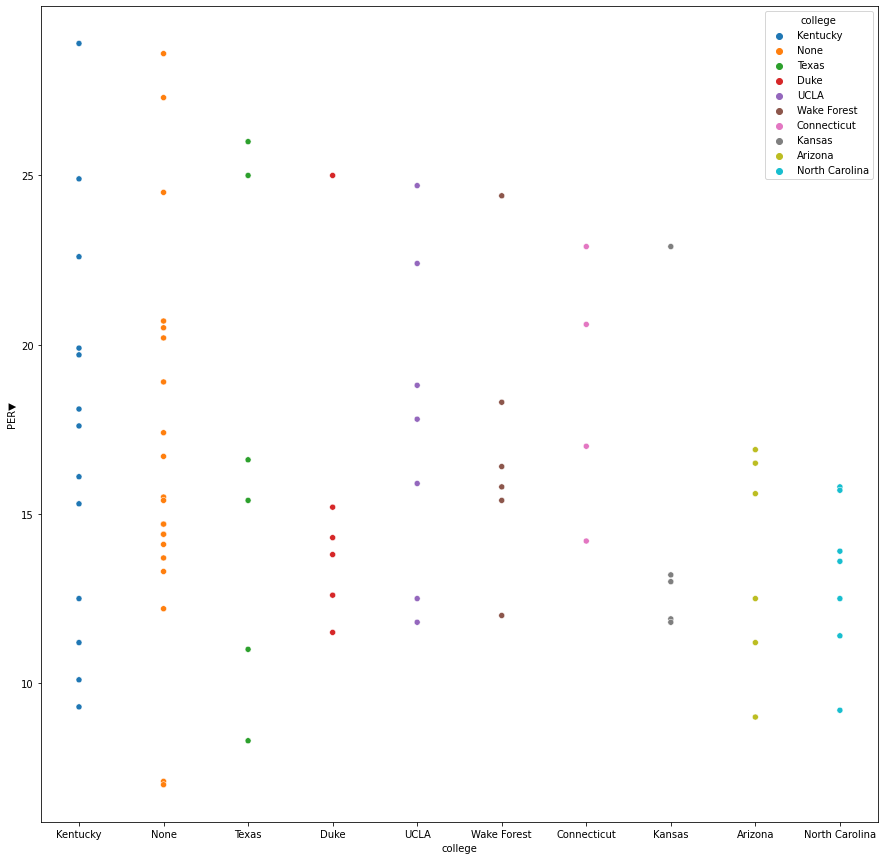

In [26]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=filter_data, x="college", y="PER▼", hue="college")

<AxesSubplot:>

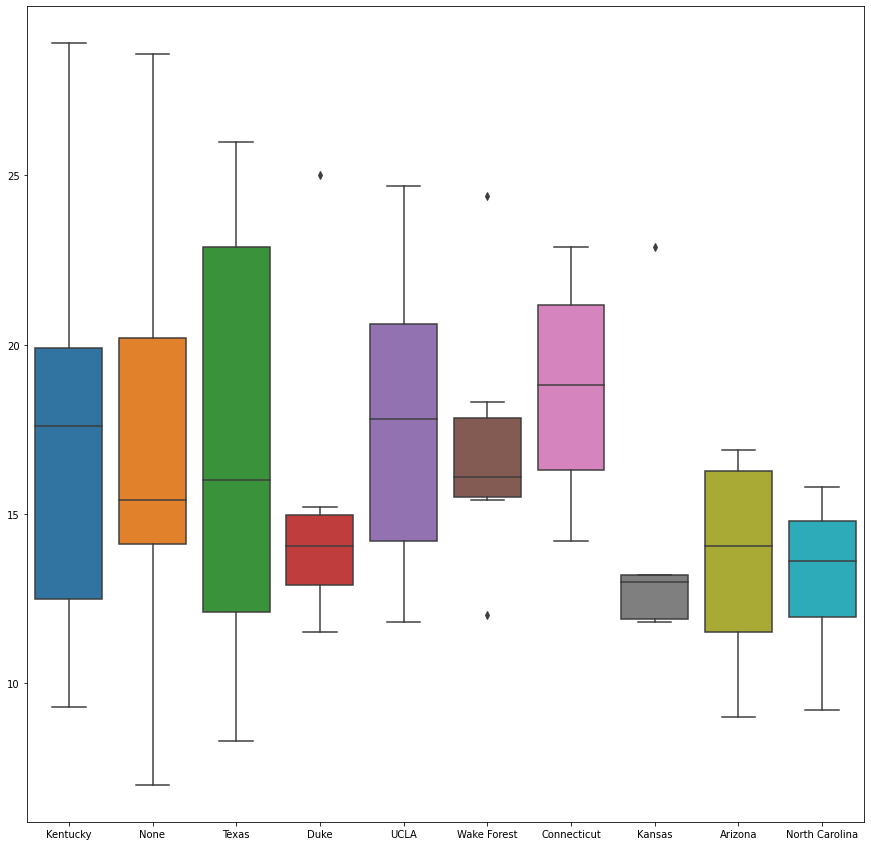

In [27]:
fig = plt.figure(figsize=(15, 15))
sns.boxplot(x=filter_data['college'].values, y=filter_data['PER▼'].values)

<AxesSubplot:xlabel='college', ylabel='PER▼'>

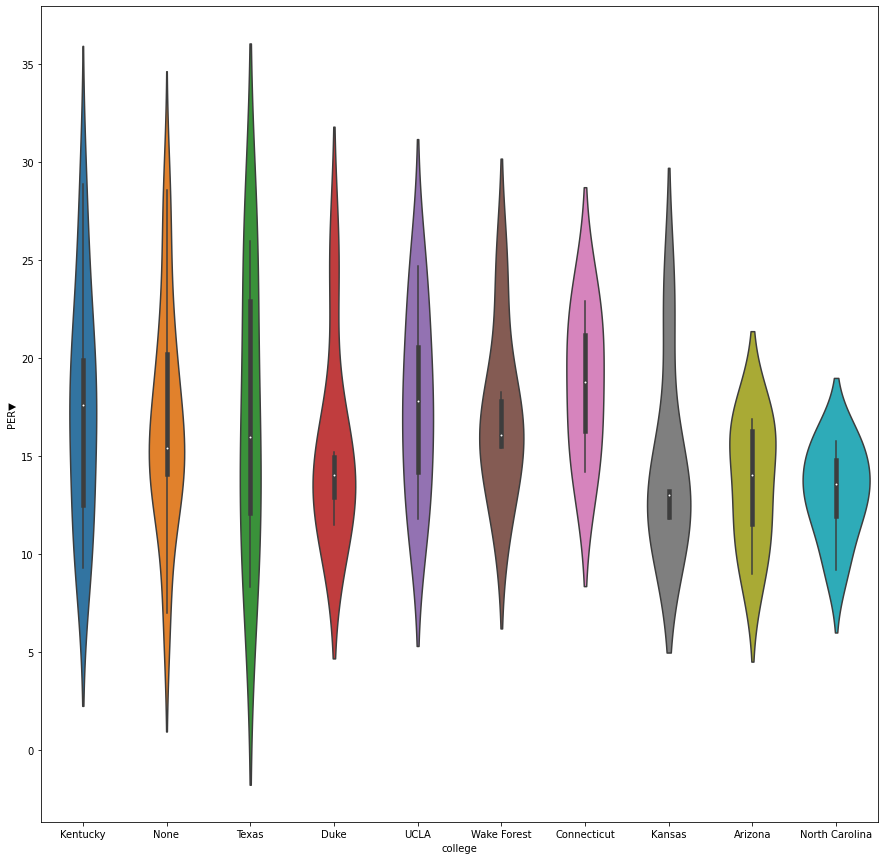

In [28]:
fig = plt.figure(figsize=(15, 15))
sns.violinplot(x="college", y="PER▼", data=filter_data)

In [29]:
data.sort_values (by='college')

,Rk,Player,PER▼,name,code,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season
191,191,Tony Snell\snellto01,8.5,Tony Snell,snellto01,9906.0,Tony Snell,MIL,26.0,200.66,100.243832,,USA,2013,2017-18
124,124,JaMychal Green\greenja01,14.0,JaMychal Green,greenja01,9615.0,JaMychal Green,MEM,28.0,205.74,102.965384,Alabama,USA,Undrafted,2017-18
91,91,Lauri Markkanen\markkla01,15.6,Lauri Markkanen,markkla01,9983.0,Lauri Markkanen,CHI,21.0,213.36,104.326160,Arizona,Finland,2017,2017-18
190,190,Stanley Johnson\johnsst04,9.0,Stanley Johnson,johnsst04,9831.0,Stanley Johnson,DET,22.0,200.66,111.130040,Arizona,USA,2015,2017-18
70,70,Aaron Gordon\gordoaa01,16.5,Aaron Gordon,gordoaa01,10070.0,Aaron Gordon,ORL,22.0,205.74,99.790240,Arizona,USA,2014,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,Tomáš Satoranský\satorto01,15.4,Tomáš Satoranský,satorto01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,104,Ersan İlyasova\ilyaser01,14.9,Ersan İlyasova,ilyaser01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,Bojan Bogdanović\bogdabo02,13.9,Bojan Bogdanović,bogdabo02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,133,Bogdan Bogdanović\bogdabo01,13.5,Bogdan Bogdanović,bogdabo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
